In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Data
- train
- test
- sample_submission

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
smp = pd.read_csv('data/sample_submission.csv')

# Data Overview

In [4]:
train.columns.tolist()

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [5]:
num_features = train.select_dtypes(include=np.number).columns.tolist()
cat_features = train.select_dtypes(exclude=np.number).columns.tolist()

print('nums: ', num_features)
print('cats: ', cat_features)

nums:  ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
cats:  ['Surname', 'Geography', 'Gender']


In [19]:
meow = train[cat_features]

CatDesc = pd.DataFrame(index = cat_features)
CatDesc['type'] = meow.dtypes
CatDesc['count'] = meow.count()
CatDesc['unique_num'] = meow.nunique()
CatDesc['nulls'] = meow.isnull().sum()
CatDesc

,type,count,unique_num,nulls
Surname,object,165034,2797,0
Geography,object,165034,3,0
Gender,object,165034,2,0


In [21]:
nums = train[num_features]

NumDesc = pd.DataFrame(index = num_features)
NumDesc['type'] = nums.dtypes
NumDesc['count'] = nums.count()
NumDesc['unique_num'] = nums.nunique()
NumDesc['nulls'] = nums.isnull().sum()
NumDesc

,type,count,unique_num,nulls
id,int64,165034,165034,0
CustomerId,int64,165034,23221,0
CreditScore,int64,165034,457,0
Age,float64,165034,71,0
Tenure,int64,165034,11,0
Balance,float64,165034,30075,0
NumOfProducts,int64,165034,4,0
HasCrCard,float64,165034,2,0
IsActiveMember,float64,165034,2,0
EstimatedSalary,float64,165034,55298,0


In [10]:
# id 제거, 데이터 overview

train_copyed = train.copy()
y = train_copyed.pop('Exited')
X = train_copyed.drop('id', axis = 1)
X.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50


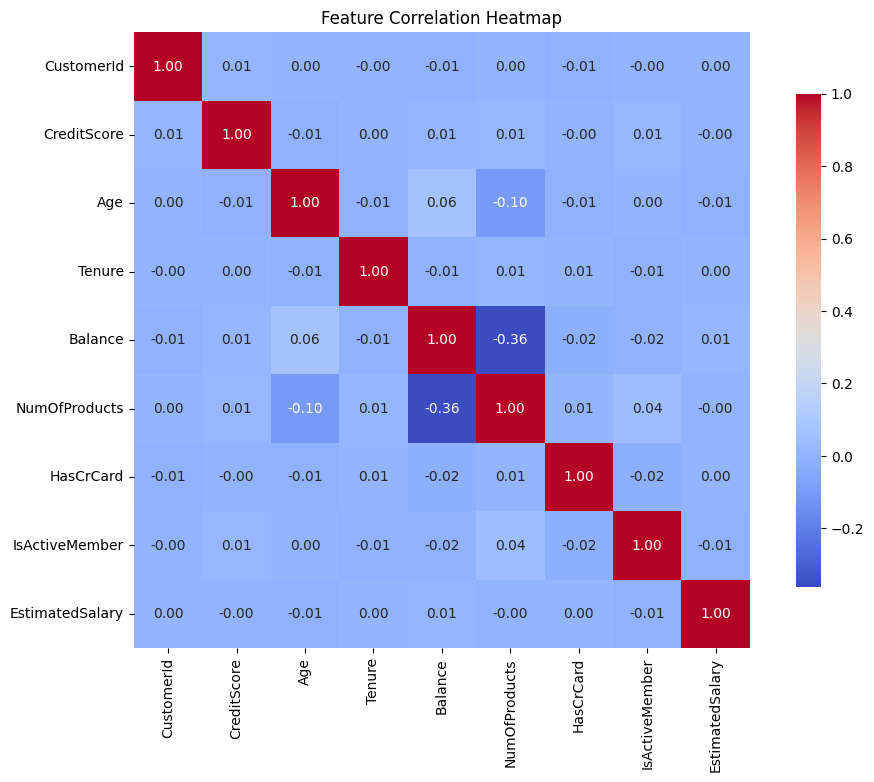

In [11]:
# 문자열 데이터 제거
train_numeric = X.select_dtypes(include=np.number)

# 상관관계 계산
correlation_matrix = train_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.show()

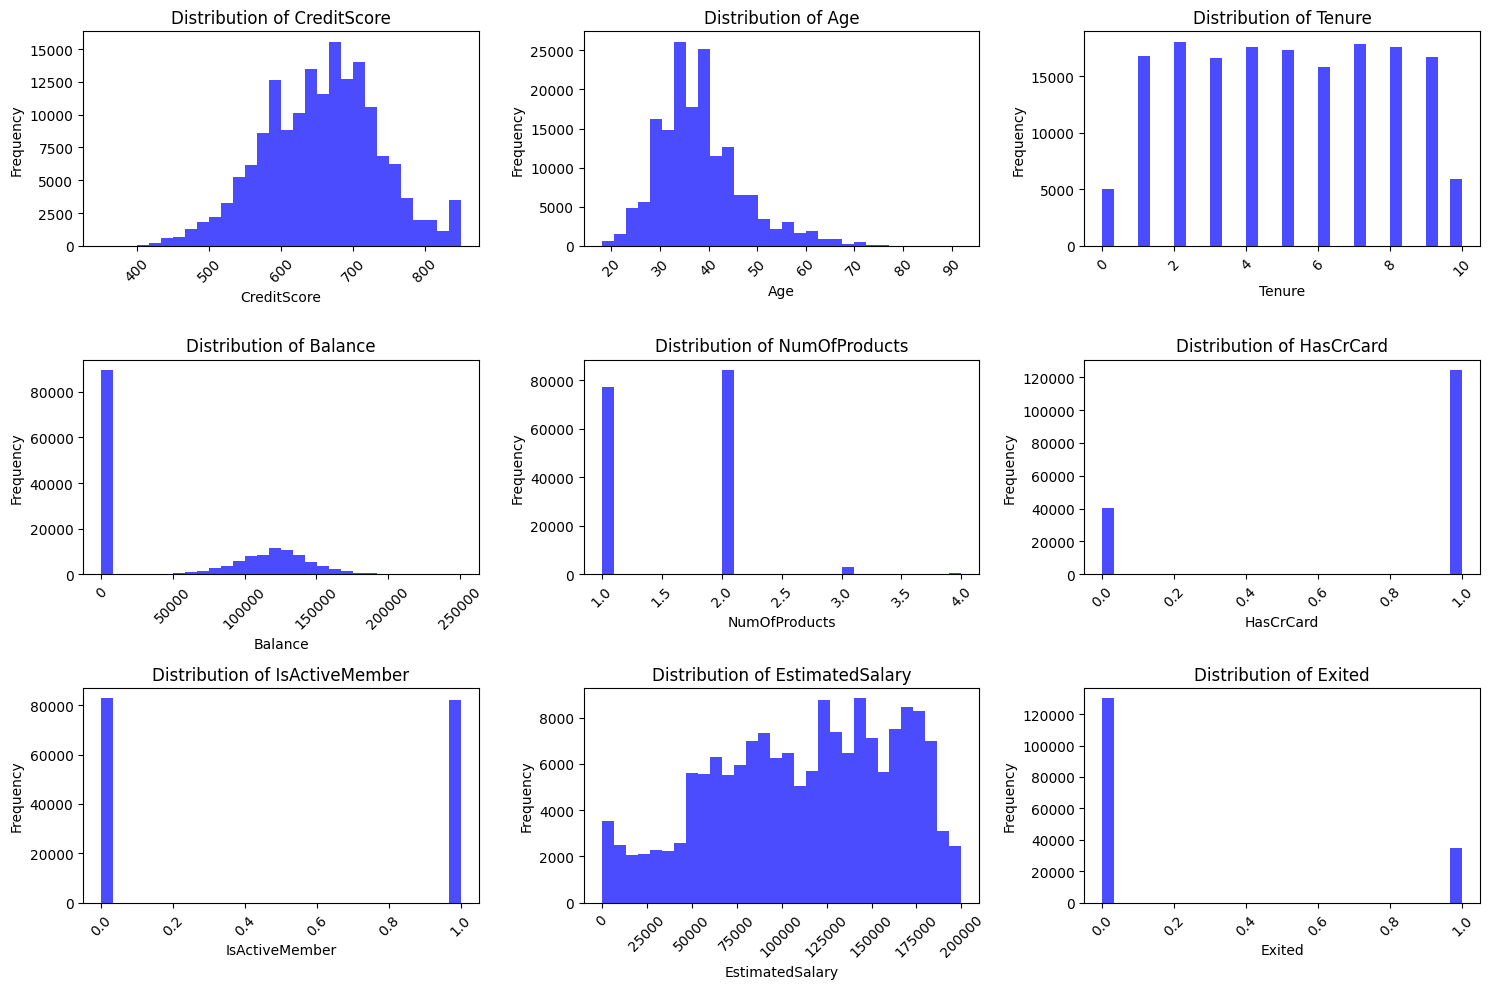

In [25]:
# 숫자형 칼럼에 대한 히스토그램 그리기
num_features = [feature for feature in num_features if feature not in ['id', 'CustomerId']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)  # 3행 3열의 서브플롯
    plt.hist(train[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation = 45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()